# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [29]:
import random
import numpy as np 
import pandas as pd 

In [48]:
def f1(x) :
    return ( np.exp(x)*np.log(x) )

def f2(x) :
    return ( np.sin(x)*np.log(x) )

N = np.logspace(1, 5, 5)
chrt = pd.DataFrame(index = N, columns = ['Aprox. Función 1', 'Error 1', 'Aprox. Función 2', 'Error 2'])



In [51]:

def montecarlo(f, N, a, b,) :
    u = np.random.uniform(a, b, round(N))
    return np.mean(f(u)) * (b - a)

for i in N :
    chrt.loc[i, 'Aprox. Función 1'] = montecarlo(f1, float(i), 1, 3)
    chrt['Error 1'] = np.abs( 14.02 - chrt['Aprox. Función 1'])
    chrt.loc[i, 'Aprox. Función 2'] = montecarlo(f2, float(i), 1, 3)
    chrt['Error 2'] = np.abs( 0.86 - chrt['Aprox. Función 2'])
chrt

,Aprox. Función 1,Error 1,Aprox. Función 2,Error 2
10.0,18.293481,4.273481,0.679298,0.180702
100.0,13.891507,0.128493,0.893295,0.033295
1000.0,14.659324,0.639324,0.874359,0.014359
10000.0,14.342922,0.322922,0.872924,0.012924
100000.0,14.069229,0.049229,0.868773,0.008773


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

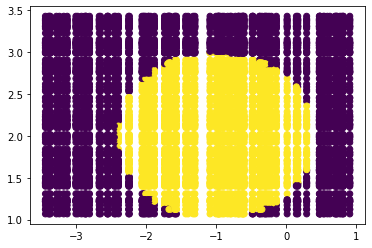

In [57]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def bernoulli(x,y) :
    return (x**2 + 2*y**2 ) <= ( -2*x + 8*y - 7)
def montecarlo(r, ax, bx, ay, by, n) :
    x = np.random.uniform(ax, bx, n)
    y = np.random.uniform(ay, by, n)
    b = r(x,y)
    ar = (bx - ax ) * (by - ay)
    return np.mean(b)*ar

n = 100
x = np.random.uniform(-3.5,1, n)
y = np.random.uniform(1, 3.5, n)
X, Y = np.meshgrid(x,y)
plt.figure()
plt.scatter(X,Y, c= bernoulli(X, Y))

## Aproximaciones 

In [63]:
montecarlo(bernoulli, -3.5, 1, 0.5, 3.5, 10)

5.4

In [64]:
montecarlo(bernoulli, -3.5, 1, 0.5, 3.5, 100)

4.05

In [65]:
montecarlo(bernoulli, -3.5, 1, 0.5, 3.5, 1000)

4.428

In [66]:
montecarlo(bernoulli, -3.5, 1, 0.5, 3.5, 10000)

4.4523

In [67]:
montecarlo(bernoulli, -3.5, 1, 0.5, 3.5, 100000)

4.437855

Podemos concluir que la aproximación más precisa de nuestra área dada por la función $$ x^2 + 2y^2 \leq -2x + 8y -7 $$ es de 4.437855 unidades cuadradas ya que estamos hablando de **área**

3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

### Primer caso

¿Cómo elegir entre dos opcions de inversión?
* Este proceso se puede utilizar en el caso de la "Rentabilidad de proyectos" donde se calcula el TIR y el VAN para poder determinar si es intereasante realizar la inversión. Por medio el proceo de Montecarlo se puede realizar lo que es VAN con la siguiente fórmula :

![Alt text](https://blog.selfbank.es/wp-content/uploads/2015/06/post1.jpg)

* Y también se usa en el calculo de el TIR :
![Alt text](https://blog.selfbank.es/wp-content/uploads/2015/06/post2.jpg)



### Segundo caso 

REISGOS
* El proceso monecarlo también se puede usar para lo que es la estimación de los riesgos. Existen 2 elementos básicos en la estimación; uno, la probabilidad de que ocurra tal evento y lo que es la gravedad. 

## Tercer caso

Análisis de opciones
* Una opción se puede definir como un instrumento financiero en el que su rendimiento depende de lo que es otro ien o activo que se conoce como subyacente.
* La aplicación en el análisis de opciones es de la siguiente manera :
![Alt text](https://www.google.com/url?sa=i&url=https%3A%2F%2Fdocplayer.es%2F8065804-El-metodo-monte-carlo-y-su-aplicacion-a-finanzas.html&psig=AOvVaw2RbDPXLkzqiTvbX84uQKo9&ust=1666667726910000&source=images&cd=vfe&ved=0CA0QjRxqFwoTCOD28aDz9_oCFQAAAAAdAAAAABAg)
